# Data Preparation for  Workshop
 >__Created__:  2018 Harrison B. Prosper


In [1]:
import os, sys
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

import matplotlib as mp
import matplotlib.pyplot as plt
import pylab as pl

from skutil import bootstrap_unweight
%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# update fonts
FONTSIZE = 20
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

mp.rc('font', **font)

### Read data into memory
  * Read data sets into memory
  * Add a target column to each dataframe for later use. 

In [3]:
def readData(bkgfilename, sigfilename):
    bkg = pd.read_csv(bkgfilename)
    bkg['target'] = np.zeros(len(bkg))
    
    sig = pd.read_csv(sigfilename)
    sig['target'] = np.ones(len(sig))

    return (bkg, sig)

In [4]:
bkg_data, sig_data = readData('../../datasets/zz.csv', '../../datasets/hzz_ggf.csv')

### Split into testing and training data samples

In [5]:
def splitData(data, test_fraction = 0.20):
    train_data, test_data = train_test_split(data, test_size=test_fraction)
    print "data split"
    print train_data.shape, test_data.shape
    print
    return (train_data, test_data)

In [6]:
train_bkg_data, test_bkg_data = splitData(bkg_data)
train_sig_data, test_sig_data = splitData(sig_data)

data split
(39770, 10) (9943, 10)

data split
(46416, 10) (11604, 10)



### Plot data

In [7]:
def plotData(b, s, gfilename,
             xlabel=r'$m_{Z1}$ (GeV)', 
             ylabel=r'$m_{Z2}$ (GeV)',
             xfield='Z1mass',
             yfield='Z2mass',
             blabel=r'$ZZ \rightarrow 4\ell$',
             slabel=r'$H \rightarrow ZZ \rightarrow 4\ell$',
             xmin=0, xmax=140, ymin=0, ymax=140,
             bcolor=(1,0,0),
             scolor=(0,0,1),
             figsize=(8,8),
             fontsize=24):
    """
    
    """
    # set size of figure
    plt.figure(figsize=(8,8));

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    
    plt.scatter(b[xfield], b[yfield], marker='*',
                s=100, c=bcolor,  alpha=0.2, label=blabel)
    pl.legend(loc='upper left') # activate legend
    
    plt.scatter(s[xfield], s[yfield], marker='o',
                s=50, c=scolor, alpha=0.2, label=slabel)
    pl.legend(loc='upper left') # activate legend
    
    plt.savefig(gfilename)
    plt.show()

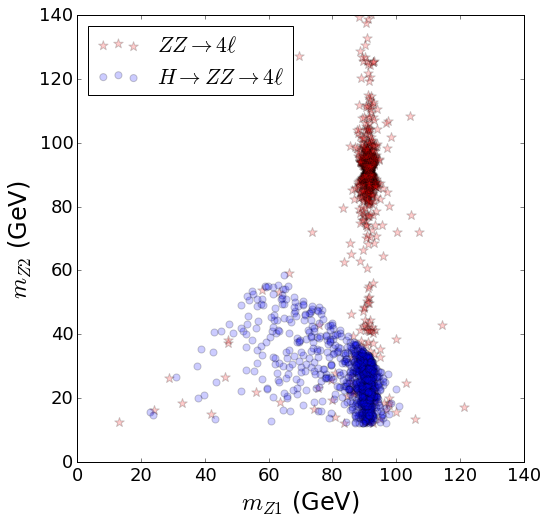

In [8]:
N = 1000
plotData(train_bkg_data[:N], train_sig_data[:N], gfilename='fig_Z1mass_Z2mass.png')

### Prepare data for training/testing and save to file
  * Concatenate training sig and bkg data, randomly shuffle rows
  * Extract two columns for inputs $X$ and targets for $y$ for both training and test data
  * Save training and test data using joblib

In [9]:
def prepareData(train_b, train_s, 
                test_b, test_s,
                filename,
                bfield='Z1mass',
                sfield='Z2mass'):
    # create a randomly shuffled array of indices of size 2*N for training data
    N = min(len(train_b), len(train_s))
    index = np.random.permutation(2*N)

    # use the iloc method to access ordinal values of the rows
    train_data = pd.concat([train_b[:N], train_s[:N]]).iloc[index]

    # create a randomly shuffled array of indices of size 2*N for test data
    N = min(len(test_b), len(test_s))
    index = np.random.permutation(2*N)
    test_data = pd.concat([test_b[:N], test_s[:N]]).iloc[index]

    # save data to a pickle file
    joblib.dump([train_data, test_data], filename)

In [10]:
prepareData(train_bkg_data, train_sig_data, 
            test_bkg_data, test_sig_data, 
            '../03/higgs_data.pkl')

### Prepare VBF vs ggF Higgs boson data

In [11]:
bkg_data, sig_data = readData('../../datasets/hzz_ggf.csv', '../../datasets/hzz_vbf.csv')

In [12]:
train_bkg_data, test_bkg_data = splitData(bkg_data)
train_sig_data, test_sig_data = splitData(sig_data)

data split
(46416, 10) (11604, 10)

data split
(50135, 10) (12534, 10)



In [13]:
help(plotData)

Help on function plotData in module __main__:

plotData(b, s, gfilename, xlabel='$m_{Z1}$ (GeV)', ylabel='$m_{Z2}$ (GeV)', xfield='Z1mass', yfield='Z2mass', blabel=r'$ZZ \rightarrow 4\ell$', slabel=r'$H \rightarrow ZZ \rightarrow 4\ell$', xmin=0, xmax=140, ymin=0, ymax=140, bcolor=(1, 0, 0), scolor=(0, 0, 1), figsize=(8, 8), fontsize=24)



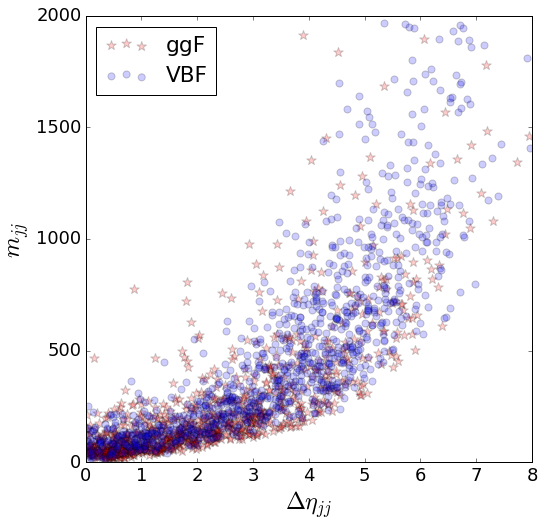

In [14]:
N = 1000
plotData(train_bkg_data[:N], train_sig_data[:N], 'fig_detajj_massjj.png', 
         xlabel=r'$\Delta\eta_{jj}$', ylabel=r'$m_{jj}$', 
         xfield='detajj', yfield='massjj', 
         blabel='ggF', slabel='VBF', 
         xmin=0, xmax=8, ymin=0, ymax=2000)

In [15]:
prepareData(train_bkg_data, train_sig_data, 
            test_bkg_data, test_sig_data, 
            '../03/higgs_vbf_ggf_data.pkl')